<a href="https://colab.research.google.com/github/Martishamao/Spanish-Red-Wine-Analysis/blob/main/Project_2_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project 2 - Part 2

#Spanish Wine Quality Dataset
- Martisha Owens
- 10/5/2022
- https://www.kaggle.com/datasets/fedesoriano/spanish-wine-quality-dataset
- This data describes 7500 different Spanish red wines.
- The features include name of the wine, winery, year, rating, number of reviews, country, region, price, type of wine variety, body, and acidity.
- The target is the rating of the Spanish wine.
- This is a Classification problem, which will predict the rating on a scale from 0 to 5 (Or for this data 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, and 4.9).


In [237]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [239]:
filename = '/content/drive/MyDrive/Coding Dojo/Project 2/wines_SPA.csv'
df = pd.read_csv(filename)
df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [240]:
dfc = df.copy()

##Delete unnecessary columns.


In [241]:
dfc['country'].value_counts()

Espana    7500
Name: country, dtype: int64

> Since the data is strictly for red wine in Spain, this column is unnecessary.

>The number of reviews is also not a defining feature of the actual wine itself and will be dropped.

In [242]:
dfc.drop(columns = {'country','num_reviews'},inplace = True)

In [243]:
dfc.head()

,winery,wine,year,rating,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


##Deleted duplicate rows.

In [244]:
dfc.duplicated().sum()

5452

In [245]:
dfc.drop_duplicates(inplace = True)
dfc.duplicated().sum()

0

In [246]:
dfc.shape

(2048, 9)

> Even after removing the duplicated data there are still 2048 instances of data and 9 columns of features.

##Identified and addressed missing values.


In [247]:
dfc.isna().sum()

winery       0
wine         0
year         2
rating       0
region       0
price        0
type       106
body       271
acidity    271
dtype: int64

> Columns year, type, body, and acidity has missing values.

In [248]:
print(f'Body and Acidity are missing {round((271/2048*100),2)}% of their data.')

Body and Acidity are missing 13.23% of their data.


###Check if  year can be manually updated.

In [249]:
dfc.loc[dfc['year'].isna()]

,winery,wine,year,rating,region,price,type,body,acidity
46,Vega Sicilia,Unico Reserva Especial Edicion,NaN,4.7,Ribera del Duero,423.5,Ribera Del Duero Red,5.0,3.0
851,La Unica,Fourth Edition,NaN,4.4,Vino de Espana,40.0,Tempranillo,4.0,2.0


In [250]:
dfc_Vega = dfc[(dfc['winery']=='Vega Sicilia')&(dfc['region']=='Ribera del Duero')&(dfc['wine']=='Unico Reserva Especial Edicion')]
dfc_Vega.head()

,winery,wine,year,rating,region,price,type,body,acidity
8,Vega Sicilia,Unico Reserva Especial Edicion,2015,4.8,Ribera del Duero,345.00,Ribera Del Duero Red,5.0,3.0
10,Vega Sicilia,Unico Reserva Especial Edicion,2016,4.8,Ribera del Duero,514.85,Ribera Del Duero Red,5.0,3.0
12,Vega Sicilia,Unico Reserva Especial Edicion,2018,4.8,Ribera del Duero,430.00,Ribera Del Duero Red,5.0,3.0
17,Vega Sicilia,Unico Reserva Especial Edicion,2019,4.8,Ribera del Duero,431.36,Ribera Del Duero Red,5.0,3.0
19,Vega Sicilia,Unico Reserva Especial Edicion,2004,4.8,Ribera del Duero,824.43,Ribera Del Duero Red,5.0,3.0


In [251]:
dfc_Unica = dfc[(dfc['wine']=='Fourth Edition')]
dfc_Unica.head()

,winery,wine,year,rating,region,price,type,body,acidity
851,La Unica,Fourth Edition,NaN,4.4,Vino de Espana,40.0,Tempranillo,4.0,2.0


> For the two datas missing year, there doesn't seem to be a hint towards what the year should be.

###Check what values are used for Body and Acidity.

In [252]:
print(dfc['body'].unique())
print(dfc['acidity'].unique())

[ 5.  4.  3. nan  2.]
[ 3.  2.  1. nan]


> For the missing numerical values year, body, and acidity, we will use the imputer strategy 'median' to get a whole number. From the unique values listed above, body and acidity are whole numbers.

> For wine type, the imputer strategy 'most frequent' will be used.

##Identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats).

In [253]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2048 entries, 0 to 6100
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   winery   2048 non-null   object 
 1   wine     2048 non-null   object 
 2   year     2046 non-null   object 
 3   rating   2048 non-null   float64
 4   region   2048 non-null   object 
 5   price    2048 non-null   float64
 6   type     1942 non-null   object 
 7   body     1777 non-null   float64
 8   acidity  1777 non-null   float64
dtypes: float64(4), object(5)
memory usage: 160.0+ KB


> Year should be a float but something is causing it to be an object column.

In [254]:
dfc['year'] = dfc['year'].astype(float)

ValueError: ignored

> There were actually more than 2 wines that had missing year values. I will replace the N.V. (No value) with an actual NaN input.

In [255]:
dfc['year'].replace('N.V.',np.nan, inplace = True)
dfc['year'] = dfc['year'].astype(float)
#https://sparkbyexamples.com/pandas/pandas-replace-nan-with-blank-empty-string/

In [256]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2048 entries, 0 to 6100
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   winery   2048 non-null   object 
 1   wine     2048 non-null   object 
 2   year     1976 non-null   float64
 3   rating   2048 non-null   float64
 4   region   2048 non-null   object 
 5   price    2048 non-null   float64
 6   type     1942 non-null   object 
 7   body     1777 non-null   float64
 8   acidity  1777 non-null   float64
dtypes: float64(5), object(4)
memory usage: 160.0+ KB


In [271]:
pd.set_option('display.max_rows', None)

dtypes = dfc.dtypes
dfc_obj = dtypes[dtypes=='object'].index
for i in dfc_obj:
  print(i)
  dfs = dfc[i]
  dfs.drop_duplicates(inplace = True)
  dfs = dfs.sort_values()
  print(dfs.to_string(index = False))
  print('\n')
  print('---'*20)
#https://stackoverflow.com/questions/68291502/expand-value-counts-view
#https://stackoverflow.com/questions/24644656/how-to-print-pandas-dataframe-without-index

winery
                                         A Coroa
                                             AGE
                                           Aalto
                                          Abadal
                                 Abadia Retuerta
                              Abel Mendoza Monge
                                  Acustic Celler
                                     Adama Wines
                   Adega Familiar Eladio Pineiro
                             Agusti Torello Mata
                                         Albamar
                                    Albet i Noya
                                        Algueira
                                           Alion
                                         Allende
                                Alonso & Pedrajo
                                Alonso del Yerro
                                     Alta Alella
                                         Altanza
                                    Alto Moncayo
             

> There are no updates needed.

##Produced univariate visuals for the target and all features.

In [260]:
dfc.nunique()

winery      480
wine        847
year         70
rating        8
region       76
price      1292
type         21
body          4
acidity       3
dtype: int64

> Limiting Wine, Winery, and Region to the top 20 counts because there are too many unique values to graph.

In [261]:
#Setting up the filters for the top 20 items per column
dfw = dfc['wine']
dfw20 = dfw.value_counts().head(20)
Winetop20 = dfc.loc[df['wine'].isin(dfw20.index)]

dfwy = dfc['winery']
dfwy20 = dfwy.value_counts().head(20)
Winerytop20 = dfc.loc[df['winery'].isin(dfwy20.index)]


dfr = dfc['region']
dfr20 = dfr.value_counts().head(20)
Regiontop20 = dfc.loc[df['region'].isin(dfr20.index)]

#https://stackoverflow.com/questions/45803676/python-pandas-loc-filter-for-list-of-values

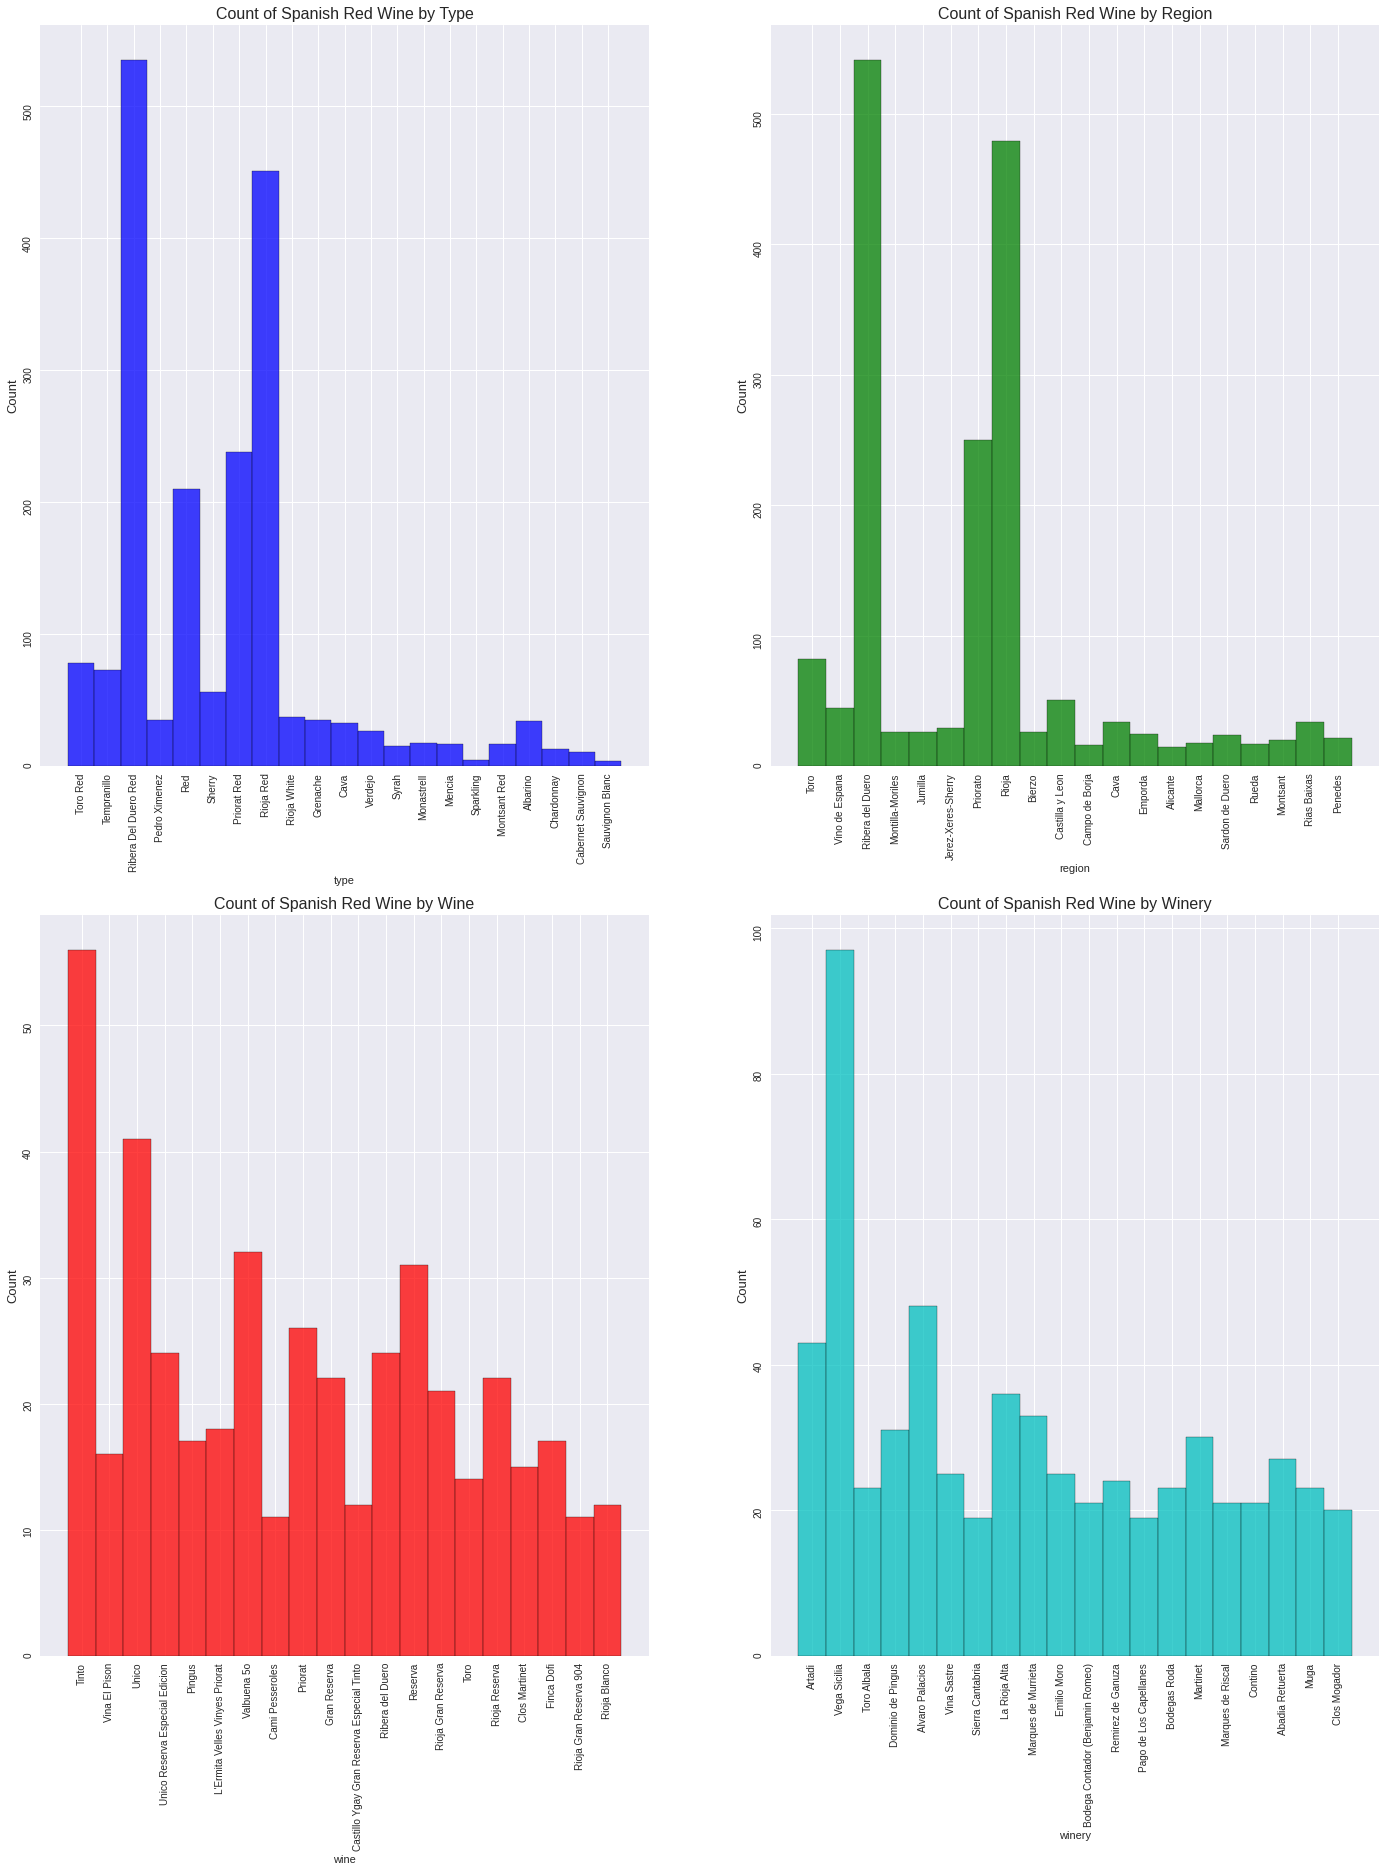

In [262]:
#Type, Region, Wine, Winery
fig, axes = plt.subplots(nrows = 2, ncols=2, figsize=(24,30))

sns.histplot(data = dfc, x = 'type',color= 'b', ax = axes[0,0])
sns.histplot(data = Regiontop20, x = 'region',  color= 'g', ax = axes[0,1])
sns.histplot(data = Winetop20, x = 'wine', color= 'r', ax = axes[1,0])
sns.histplot(data = Winerytop20, x = 'winery', color= 'c', ax = axes[1,1])

for i in range(0,2):
  for x in range(0,2):
    axes[i,x].tick_params(rotation=90) 
    axes[i,x].set_ylabel('Count',size = 13)

title_list = [(0,0, 'Count of Spanish Red Wine by Type'),(0,1,'Count of Spanish Red Wine by Region'),(1,0, 'Count of Spanish Red Wine by Wine'),(1,1,'Count of Spanish Red Wine by Winery')]
for i, x, n in title_list:
  axes[i,x].set_title(n,size = 16)

plt.style.use('seaborn');
#xhttps://stackoverflow.com/questions/51933830/using-multiple-variables-in-a-for-loop-in-python

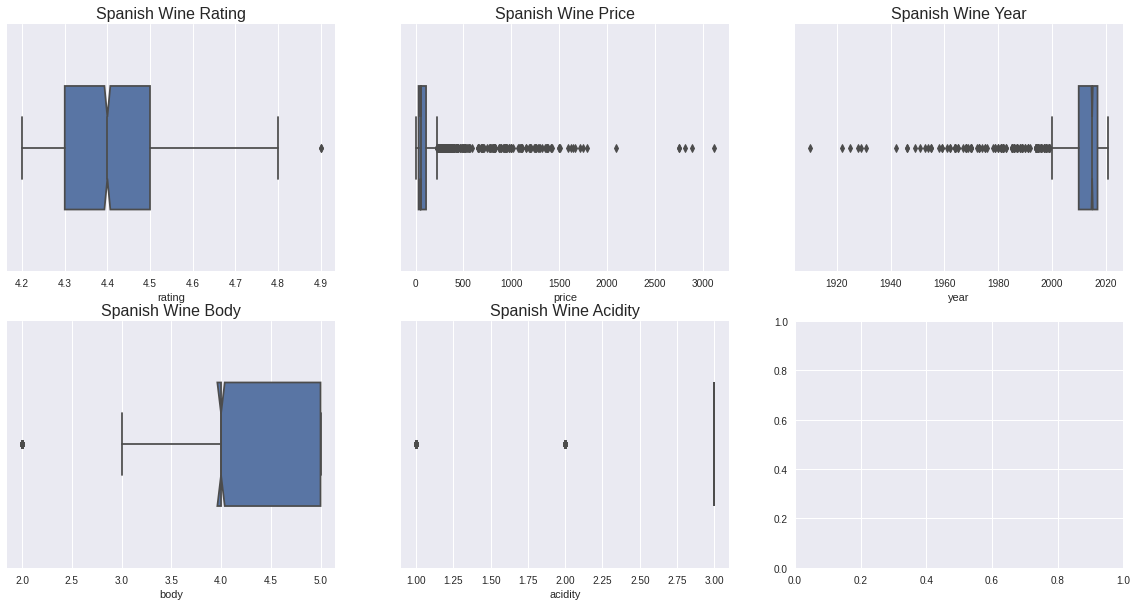

In [263]:
#Year, Rating, Price, Body, Acidity
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (20,10))

sns.boxplot(data=dfc, x = 'rating', notch = True, width = .5, ax = axes[0,0])
sns.boxplot(data=dfc, x = 'price', notch = True, width = .5, ax = axes[0,1])
sns.boxplot(data=dfc, x = 'year', notch = True, width = .5, ax = axes[0,2])
sns.boxplot(data=dfc, x = 'body', notch = True, width = .5, ax = axes[1,0])
sns.boxplot(data=dfc, x = 'acidity', notch = True, width = .5, ax = axes[1,1])

axes[0,0].set_title('Spanish Wine Rating',size = 16)
axes[0,1].set_title('Spanish Wine Price',size=16)
axes[0,2].set_title('Spanish Wine Year',size=16)
axes[1,0].set_title('Spanish Wine Body',size=16)
axes[1,1].set_title('Spanish Wine Acidity',size=16);

##Identified outliers.



> - The ratings data did not have much of an outlier, with just one at 4.9. 
- Price on the other hand had quite a few outliers on the higher end. The 75th percentile was 110 but there were outliers that ranged all the way up to 3,119.
- Year also had a ton of outliers but on the lower end. The lower whisker was at 2000 but the minimum outlier was 1910.
- The Body of wine had a wide range for the 50th to 75th quartile. In terms of outliers, there was one at 2.
- Lastly, the acidity was concentrated at 3.00. The outlier was anything that wasn't 3, which concluded in two values 1 and 2.

In [264]:
dfc.describe(include='all')

,winery,wine,year,rating,region,price,type,body,acidity
count,2048,2048,1976.000000,2048.000000,2048,2048.000000,1942,1777.000000,1777.000000
unique,480,847,NaN,NaN,76,NaN,21,NaN,NaN
top,Vega Sicilia,Tinto,NaN,NaN,Ribera del Duero,NaN,Ribera Del Duero Red,NaN,NaN
freq,97,56,NaN,NaN,541,NaN,535,NaN,NaN
mean,NaN,NaN,2011.150810,4.401123,NaN,135.242194,NaN,4.258863,2.921216
std,NaN,NaN,11.186906,0.147023,NaN,272.178316,NaN,0.652836,0.334713
min,NaN,NaN,1910.000000,4.200000,NaN,4.990000,NaN,2.000000,1.000000
25%,NaN,NaN,2010.000000,4.300000,NaN,31.917947,NaN,4.000000,3.000000
50%,NaN,NaN,2015.000000,4.400000,NaN,53.625000,NaN,4.000000,3.000000
75%,NaN,NaN,2017.000000,4.500000,NaN,110.000000,NaN,5.000000,3.000000


###Other visuals

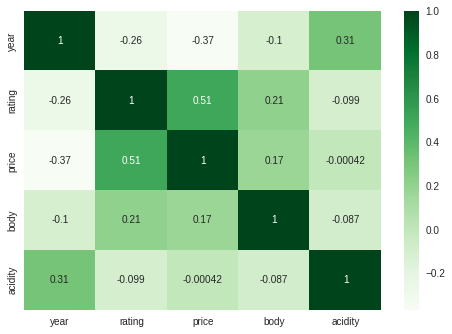

In [265]:
sns.heatmap(dfc.corr(), cmap = 'Greens',annot=True);

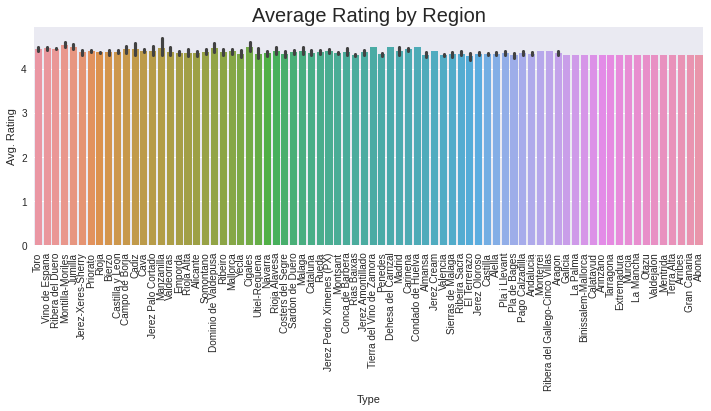

In [266]:
#Rating
fig, ax = plt.subplots(ncols=1, figsize=(12,4))

ax = sns.barplot(data=dfc, x='region', y = 'rating')

ax.tick_params(axis='x', rotation=90)
plt.ylabel('Avg. Rating')
plt.xlabel('Type')
ax.set_title('Average Rating by Region',fontsize = 20);